In [1]:
# first recreate the problem

In [2]:
import sys
sys.path.append('..')
from nbhd.data import Base
from nbhd.geography import Neighbourhood
from nbhd.geometry import *



Initializing database connection...
Database connected!


In [3]:
n = Neighbourhood()

Getting data took 0 minutes, 0 seconds.


In [4]:
n.tessellate()

<AxesSubplot:>

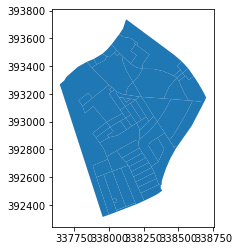

In [5]:
n.tiles.plot()

In [6]:
boundary = gpd.GeoDataFrame(geometry=gpd.GeoSeries(n.geom.boundary))

In [7]:
import matplotlib.pyplot as plt

In [8]:
from mapclassify import greedy

In [9]:
def cellularize(pts_geoseries, polygon):
    'Return Voronoi cells for points in polygon.'
    
    points = np.array([[p.x, p.y] for p in pts_geoseries])

    vor = Voronoi(points) 
    lines = [
        LineString(vor.vertices[line])
        for line in vor.ridge_vertices
#         if -1 not in line
    ]
    
    return lines

#     polys = polygonize(lines)

#     cells = [x for p in polys 
#                  for x in list(split(p, polygon.buffer(50).boundary)) 
#                  if polygon.buffer(50).contains(x)
#                 ]
#     return gpd.GeoDataFrame(geometry=gpd.GeoSeries(cells))



In [10]:
clines = cellularize(n.uprn.geometry, n.geom)

In [11]:
gdf= gpd.GeoDataFrame(geometry=gpd.GeoSeries(clines))

<AxesSubplot:>

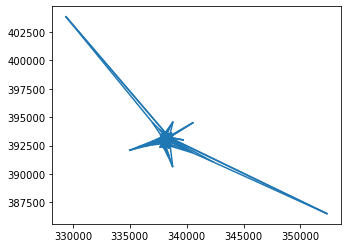

In [12]:
gdf.plot()

In [13]:
from shapely.geometry import MultiLineString

In [14]:
local = gdf.geometry.apply(lambda x: MultiLineString([line for line
                                in list(split(x, n.geom.boundary))
                                if n.geom.buffer(1).contains(line)
                               ]))

<AxesSubplot:>

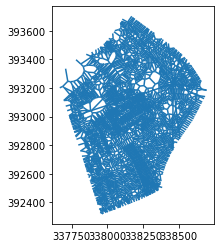

In [15]:
local.plot()

In [16]:
def tessellate(border_gdf_list):
    'Return tessellations from list of borders in geodataframes.'

    borders = pd.concat(border_gdf_list)
    borderlines = borders.unary_union
    polygons = polygonize(borderlines)
    tessellation = gpd.array.from_shapely(list(polygons),
                                        crs=27700)
    return gpd.GeoDataFrame(geometry=tessellation)

In [17]:
glocal = gpd.GeoDataFrame(geometry=local)

In [18]:
vtiles = tessellate([boundary, glocal])

In [19]:
vtiles['c'] = greedy(vtiles)

<AxesSubplot:>

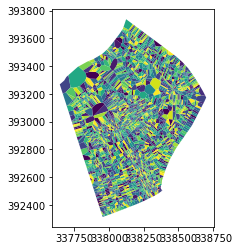

In [20]:
vtiles.plot('c')